In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/calorie/sample_submission.csv
/kaggle/input/calorie/train.csv
/kaggle/input/calorie/test.csv


**Importing necessities**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the Data**

In [5]:
train=pd.read_csv("/kaggle/input/calorie/train.csv")
test=pd.read_csv("/kaggle/input/calorie/test.csv")
sample=pd.read_csv("/kaggle/input/calorie/sample_submission.csv")

****

**Datasets Info**

In [6]:
print(train.head())
print(train.info())

   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8

In [7]:
train.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [8]:
print(train.isnull().sum())

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [9]:
test.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')

In [10]:
print(test.isnull().sum())

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64


**EDA Analysis**

<Axes: xlabel='Sex', ylabel='count'>

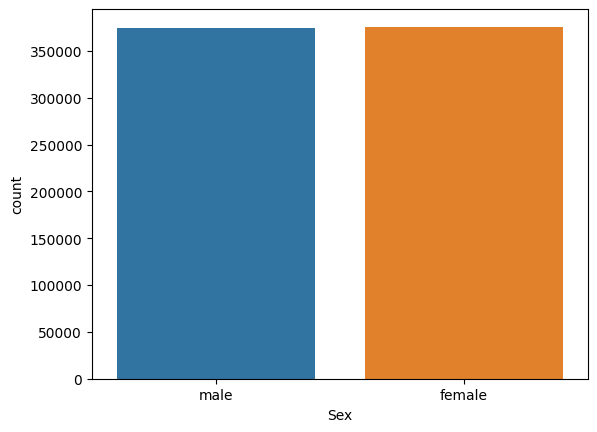

In [11]:
sns.countplot(x='Sex',data=train)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


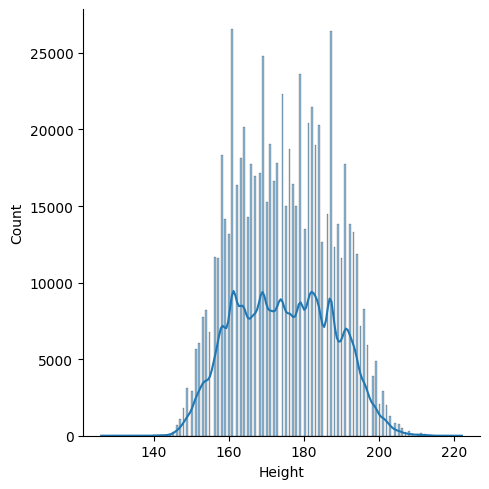

In [12]:
 sns.displot(train["Height"], kde=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Count'>

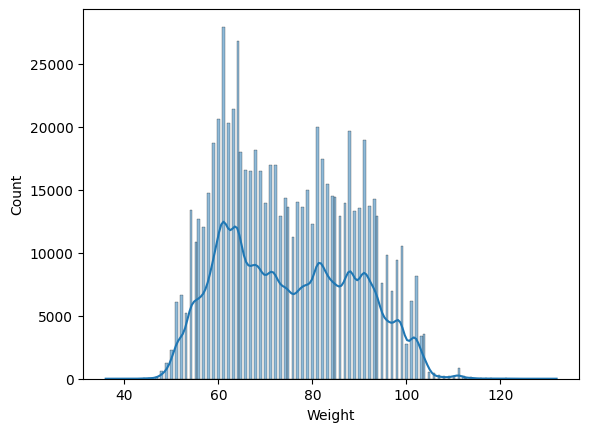

In [13]:
sns.histplot(train["Weight"],kde=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


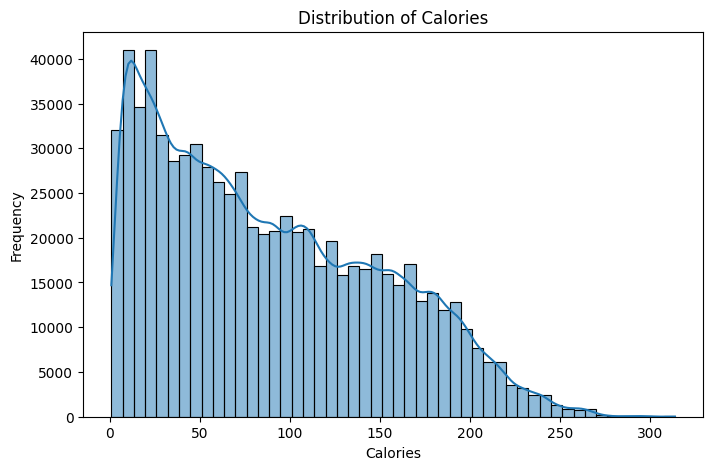

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(train['Calories'], bins=50, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


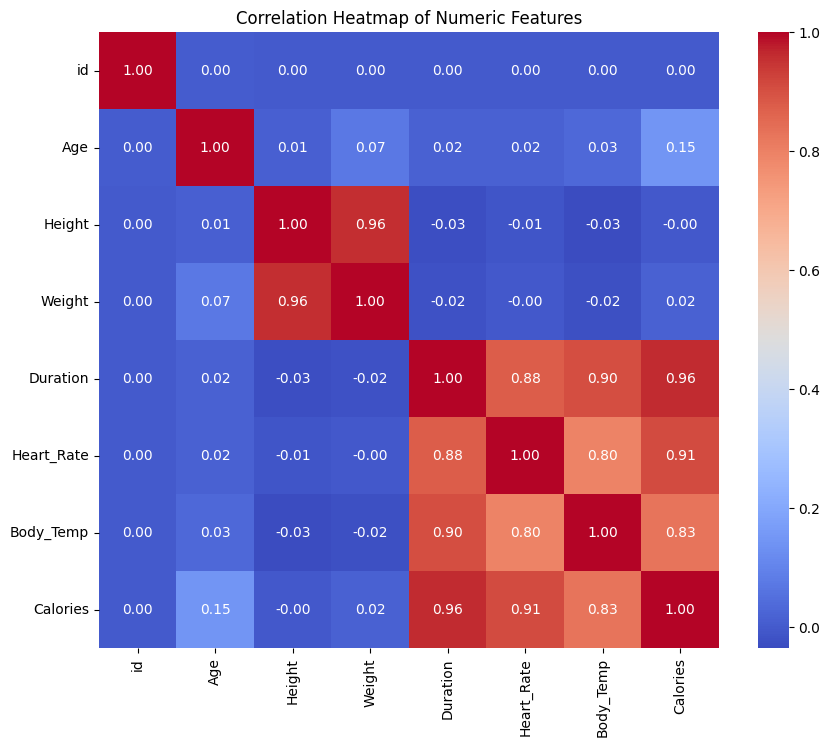

In [15]:
numeric_cols = train.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


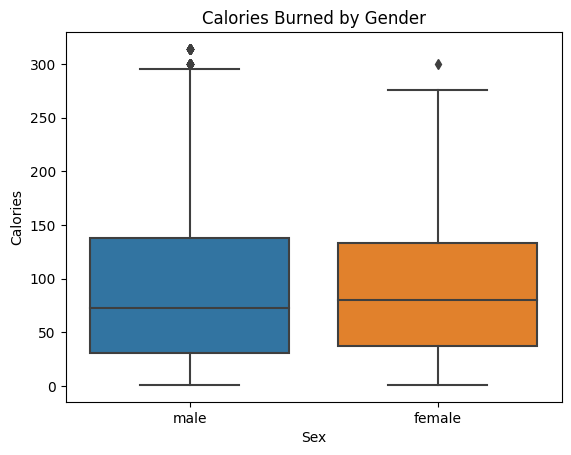

In [16]:
sns.boxplot(x='Sex', y='Calories', data=train)
plt.title("Calories Burned by Gender")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

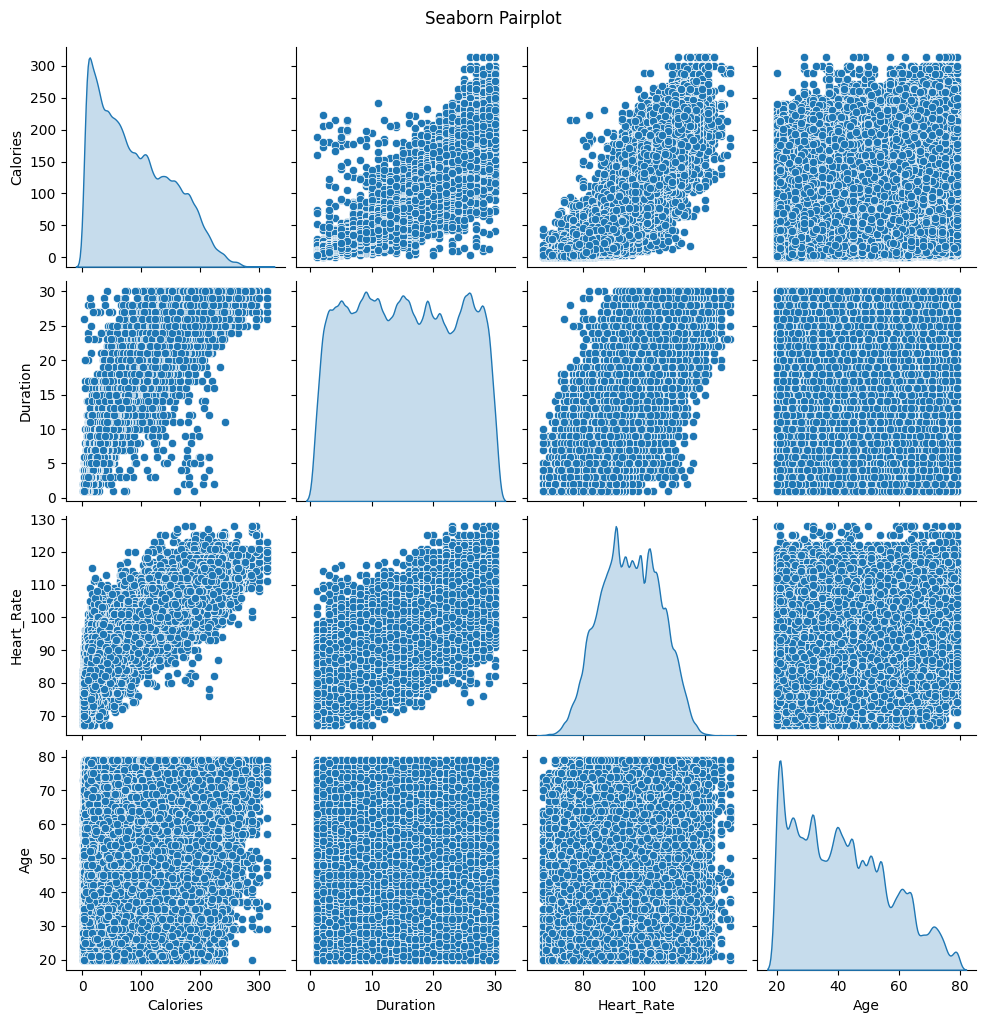

In [17]:
sns.pairplot(train[['Calories', 'Duration', 'Heart_Rate', 'Age']], diag_kind='kde')
plt.suptitle("Seaborn Pairplot", y=1.02)
plt.show()

**Selected Features**

In [18]:

train['Sex_encoded'] = train['Sex'].map({'male': 0, 'female': 1})


In [19]:
features = ['Sex_encoded', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
target = 'Calories'


**Train-Test Split**

In [20]:
from sklearn.model_selection import train_test_split

X = train[features]
y = train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Feature Scaling**

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Model Training**

In [22]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))


In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("RMSLE (Random Forest):", rmsle(y_test, rf_preds))


RMSLE (Random Forest): 0.0633842762155603


In [27]:
print("Min y_test:", y_test.min())
print("Min prediction:", xgb_preds.min())


Min y_test: 1.0
Min prediction: -0.3151037


In [32]:
xgb_preds = np.maximum(0, xgb_preds)


In [33]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

def rmsle(y_true, y_pred):
    y_pred = np.maximum(0, y_pred)  # ensure no negative predictions
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

print("RMSLE (XGBoost):", rmsle(y_test, xgb_preds))


RMSLE (XGBoost): 0.06817993870819132


In [36]:
test['Sex_encoded'] = test['Sex'].map({'male': 0, 'female': 1})

test_features = test[['Sex_encoded', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]

test_scaled = scaler.transform(test_features)

final_preds = xgb.predict(test_scaled)

final_preds = np.maximum(0, final_preds)


**Creating Submission File**

In [38]:
submission = pd.DataFrame({
    'id': test['id'],
    'Calories': final_preds
})

submission.to_csv('submission.csv', index=False)